# Anime-Recommender-System-Project-2025

<center>
  <img src='https://mostaql.hsoubcdn.com/uploads/thumbnails/1450164/661a5b0c8a072/dataset-card.jpg'width='700'/>
</center>

# Table of Contents
- [1. Project Overview](#1-project-overview)
  - [1.1 Introduction](#11-introduction)
  - [1.2 Problem Statement](#12-problem-statement)
  - [1.3 Objectives](#13-objectives)
- [2. Importing Packages](#2-importing-packages)
- [3. Loading Data](#3-loading-data)
- [4. Data Cleaning](#4-data-cleaning)
- [5. Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
- [6. Preprocessing](#6-preprocessing)
- [7. Model Training](#7-model-training)
- [8. Model Evaluation](#8-model-evaluation)
- [9. Hyperparameter Tuning](#9-hyperparameter-tuning)
- [10. Conclusion](#10-conclusion)

### 1. Project Overview

##### 1.1 Introduction

##### 1.2 Problem Statement

##### 1.3 Objectives

### 2. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import re
from html import unescape
import html

### 3. Loading Data

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_anime = pd.read_csv('anime.csv')
df_submission = pd.read_csv('submission.csv')

#### 3.1. Exploring the Dataset
In this section, we explore the dataset to understand its structure and the information it contains. The code snippets below provide an overview of the dataset's shape, the number of columns, and metadata information about the dataset.

In [5]:
# Reading the anime.csv file into a DataFrame
anime_df = pd.read_csv('anime.csv')
anime_df.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [7]:
# Reading the train.zip (csv) file into a DataFrame
train_df = pd.read_csv('train.csv')
train_df.head(3)

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10


In [9]:
# Reading the test.csv file into a DataFrame
test_df = pd.read_csv('test.csv')
test_df.head(3)

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281


### 4. Data Cleaning

#### 4.1. Missing value

In [11]:
# Check for missing values
print("Missing values in anime_df:")
print(anime_df.isnull().sum())
print("\nMissing values in train_df:")
print(train_df.isnull().sum())
print("\nMissing values in test_df:")
print(test_df.isnull().sum())

Missing values in anime_df:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing values in train_df:
user_id     0
anime_id    0
rating      0
dtype: int64

Missing values in test_df:
user_id     0
anime_id    0
dtype: int64


#### 4.2 Drop Duplicates 

In [13]:
# Remove duplicates if any
anime_df.drop_duplicates(inplace=True)
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

#### 4.3. Cleaning anime_df 

In [15]:
from html import unescape  # ✅ Import unescape to avoid NameError
import re
import pandas as pd

def clean_anime_df(df):
    # Ensure anime_id is unique and non-null
    assert df['anime_id'].is_unique, "anime_id column has duplicate values."
    assert df['anime_id'].notnull().all(), "anime_id column has null values."
    df['anime_id'] = df['anime_id'].astype(int)

    # Function to clean names and unescape HTML entities
    def clean_name(name):
        name = unescape(name)  # ✅ Convert HTML entities to characters
        name = name.lower().strip()  # Convert to lowercase and strip whitespace
        name = name.replace("&#039;", "'").replace("°", "")
        name = re.sub(r'[^a-zA-Z0-9\s\.\,\-\&\:\;\']', '', name)  # Remove unwanted special characters
        return name

    # Apply the cleaning function to the 'name' column
    df['name'] = df['name'].apply(clean_name)

    # Handle missing values in 'genre' and split into lists
    df['genre'] = df['genre'].fillna('')
    df['genre'] = df['genre'].apply(lambda x: x.split(', '))

    # Standardize genre lists
    df['genre'] = df['genre'].apply(lambda genres: [genre.strip().lower() for genre in genres])

    # Standardize the 'type' column
    df['type'] = df['type'].str.lower().str.strip().fillna('unknown')

    # Ensure episodes is numeric and handle missing values
    df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(-1).astype(int)

    # Ensure rating is numeric and handle missing values
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(-1.0)

    # Ensure members is numeric and handle missing values
    df['members'] = pd.to_numeric(df['members'], errors='coerce').fillna(0).astype(int)

    return df

# Example usage:
# anime_df = clean_anime_df(anime_df)


In [17]:
# Clean the dataframes
anime_df = clean_anime_df(anime_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned anime_df:\n{anime_df.head()}')

Cleaned anime_df:
   anime_id                              name  \
0     32281                    kimi no na wa.   
1      5114  fullmetal alchemist: brotherhood   
2     28977                           gintama   
3      9253                       steins;gate   
4      9969                          gintama'   

                                               genre   type  episodes  rating  \
0             [drama, romance, school, supernatural]  movie         1    9.37   
1  [action, adventure, drama, fantasy, magic, mil...     tv        64    9.26   
2  [action, comedy, historical, parody, samurai, ...     tv        51    9.25   
3                                 [sci-fi, thriller]     tv        24    9.17   
4  [action, comedy, historical, parody, samurai, ...     tv        51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


#### 4.4. Cleaning train data

In [23]:
# Define function to clean train_df
def clean_train_df(df):
    # Ensure user_id and anime_id are non-null and numeric
    df = df.dropna(subset=['user_id', 'anime_id'])
    df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
    df['anime_id'] = pd.to_numeric(df['anime_id'], errors='coerce')
    
    # Handle ratings: ensure they are integers and within a valid range
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    
    # Option 1: Filter out rows where rating is -1, ensuring rating remains an integer
    df = df[df['rating'] != -1]
    
    # Remove remaining rows with NaN values that could not be converted
    df.dropna(subset=['user_id', 'anime_id', 'rating'], inplace=True)

    # Ensure the remaining ratings are within the valid range
    df = df[(df['rating'] >= 1) & (df['rating'] <= 10)]
    df['rating'] = df['rating'].astype(int)  # Ensure rating column is of integer type

    return df

In [25]:
# Clean the dataframes
train_df = clean_train_df(train_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned train_df:\n{train_df.head()}')

Cleaned train_df:
   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10
3        2     11771      10
4        3        20       8


#### 4.5. Cleaning test data

In [27]:
# Define function to clean test_df
def clean_test_df(df):
    # Ensure user_id and anime_id are non-null and numeric
    df = df.dropna(subset=['user_id', 'anime_id'])
    df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
    df['anime_id'] = pd.to_numeric(df['anime_id'], errors='coerce')
    
    # Remove rows with NaN values that could not be converted
    df.dropna(subset=['user_id', 'anime_id'], inplace=True)
    
    return df

In [29]:
# Clean the dataframes
test_df = clean_test_df(test_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned test_df:\n{test_df.head()}')

Cleaned test_df:
   user_id  anime_id
0    40763     21405
1    68791     10504
2    40487      1281
3    55290       165
4    72323     11111


### 5. Exploratory Data Analysis (EDA)

#### 5.1 EDA on anime_df
Summary Statistics: Get an overview of the dataset.
Distribution of Anime Types: Analyze the types of anime (e.g., TV, Movie, OVA).
Distribution of Genres: Analyze the genres and their frequency.
Rating Distribution: Visualize the distribution of anime ratings.
Members Distribution: Analyze the distribution of the number of members who have rated the anime.

In [19]:
# Summary statistics for anime_df
print("Summary statistics for anime_df:")
print(anime_df.describe())

Summary statistics for anime_df:
           anime_id      episodes        rating       members
count  12294.000000  12294.000000  12294.000000  1.229400e+04
mean   14058.221653     12.012445      6.334078  1.807134e+04
std    11455.294701     46.264788      1.435287  5.482068e+04
min        1.000000     -1.000000     -1.000000  5.000000e+00
25%     3484.250000      1.000000      5.820000  2.250000e+02
50%    10260.500000      2.000000      6.550000  1.550000e+03
75%    24794.500000     12.000000      7.170000  9.437000e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06


#### 5.2. Distribution of Rating

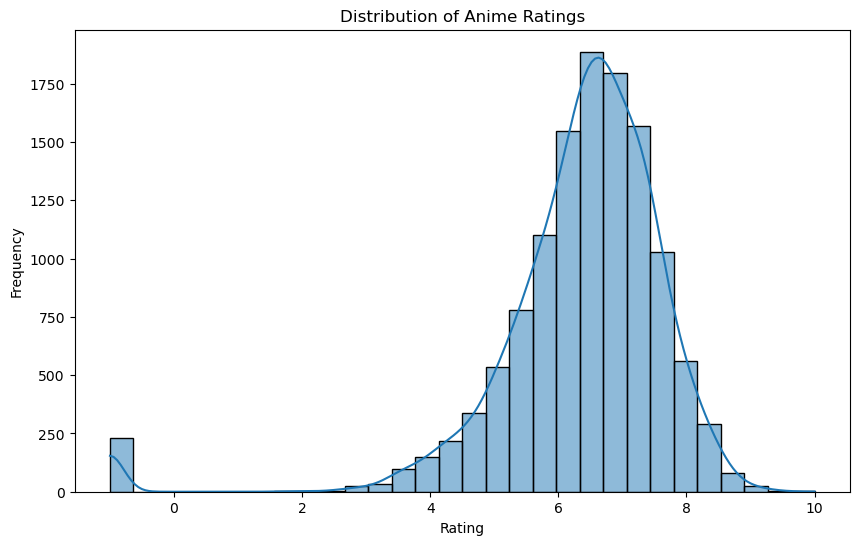

In [22]:
# Distribution of anime ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### 5.3. Distribution of Number of Members

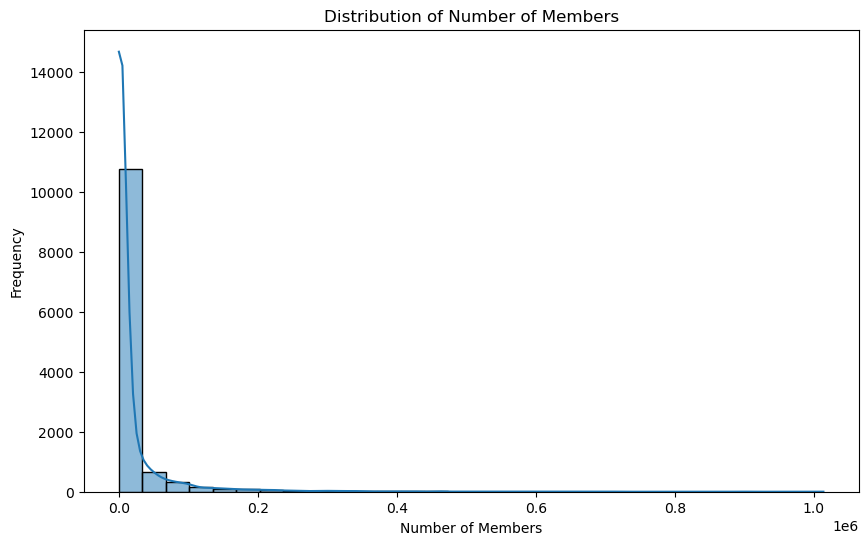

In [23]:
# Distribution of number of members
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['members'], bins=30, kde=True)
plt.title('Distribution of Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Frequency')
plt.show()

#### 5.4. Rating by Anime Type

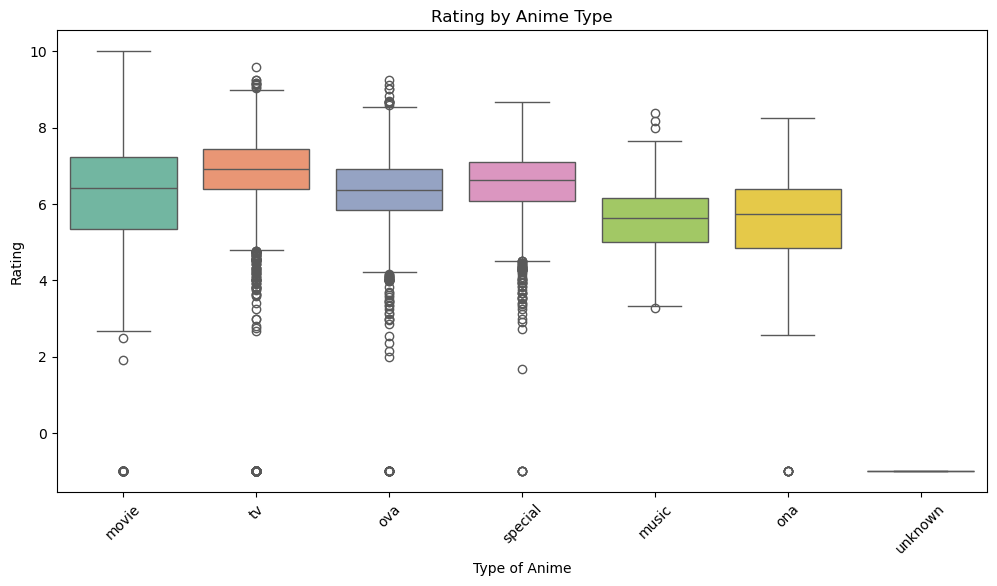

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating', data=anime_df, palette="Set2")  # Try 'husl', 'coolwarm', 'pastel', etc.
plt.title('Rating by Anime Type')
plt.xlabel('Type of Anime')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


#### 5.5. Top 10 Most Popular Anime

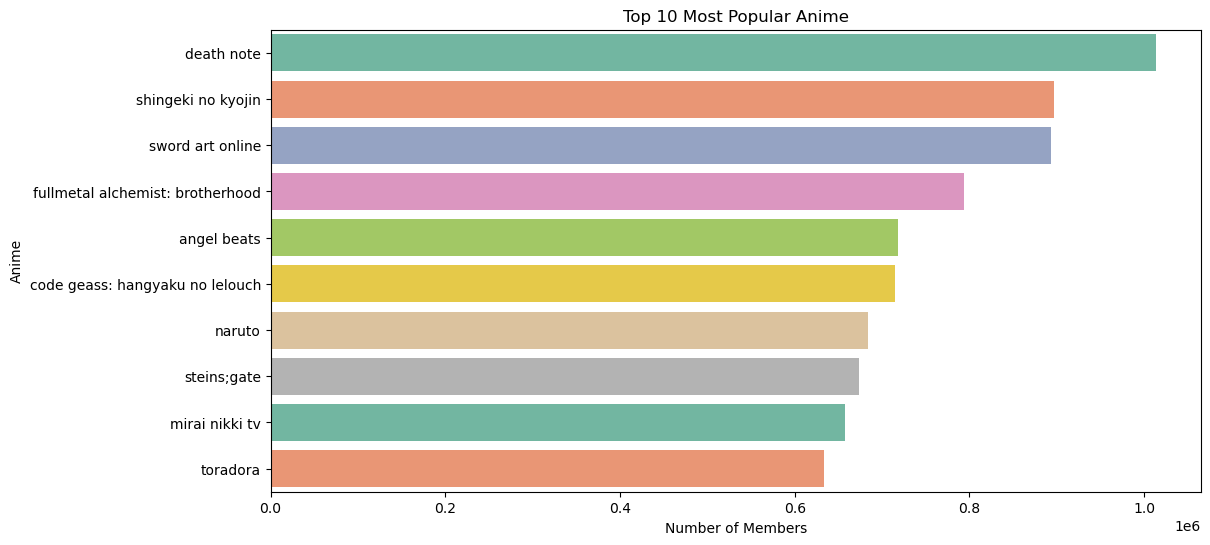

In [28]:
# Top 10 most popular anime
top_10_anime = anime_df.sort_values(by='members', ascending=False).head(10)

# Define a custom color palette with distinct colors
colors = sns.color_palette("Set2", len(top_10_anime))  # You can change "Set2" to other palettes like "Set1", "Paired", etc.

plt.figure(figsize=(12, 6))
sns.barplot(x='members', y='name', data=top_10_anime, palette=colors, orient='h')
plt.title('Top 10 Most Popular Anime')
plt.xlabel('Number of Members')
plt.ylabel('Anime')
plt.show()


#### 5.6. Correlation Matrix

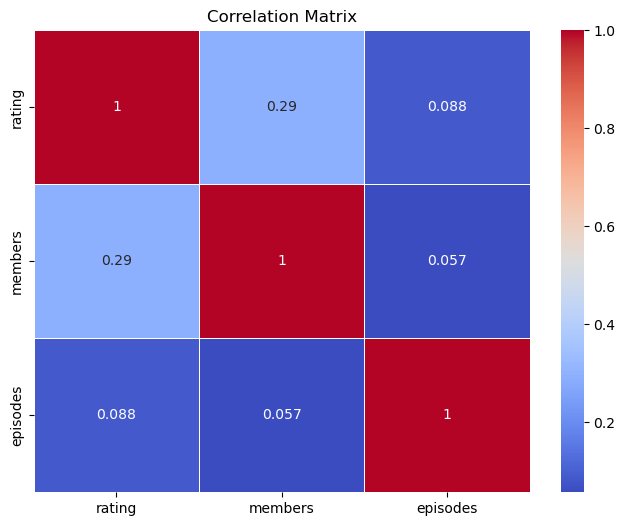

In [29]:
# Correlation matrix
corr_matrix = anime_df[['rating', 'members', 'episodes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### 5.7. User Rating Distribution

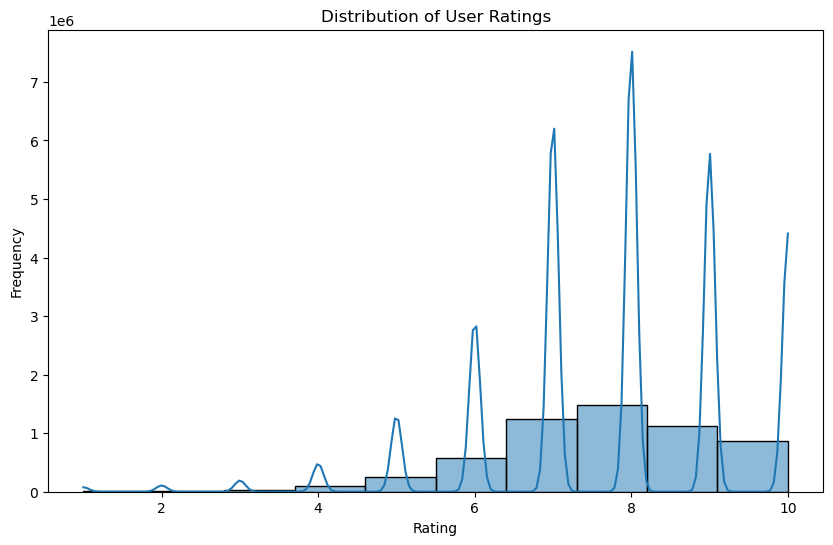

In [30]:
# Distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(train_df['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### 5.8. Top Rated Animes by Users

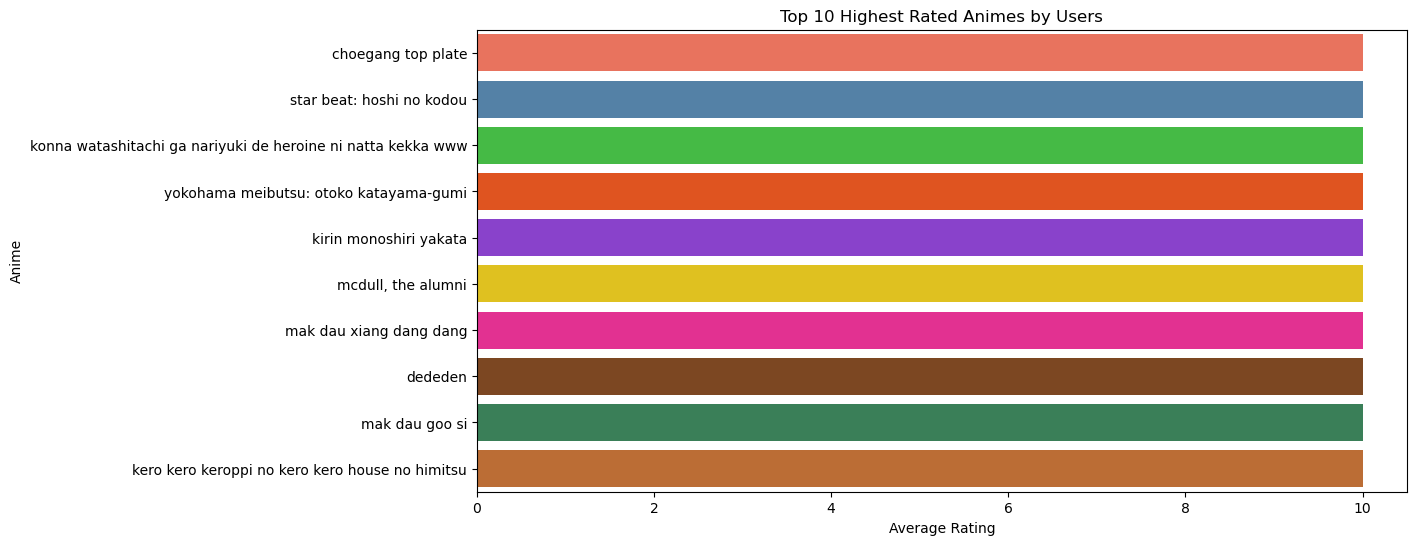

In [35]:
# Top rated animes by users
top_rated_animes = train_df.groupby('anime_id').mean()['rating'].sort_values(ascending=False).head(10).reset_index()
top_rated_animes = top_rated_animes.merge(anime_df[['anime_id', 'name']], on='anime_id')

# Define a custom list of colors for the bars (you can replace these with any color codes you like)
colors = ['#FF6347', '#4682B4', '#32CD32', '#FF4500', '#8A2BE2', '#FFD700', '#FF1493', '#8B4513', '#2E8B57', '#D2691E']

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_rated_animes, palette=colors, orient='h')
plt.title('Top 10 Highest Rated Animes by Users')
plt.xlabel('Average Rating')
plt.ylabel('Anime')
plt.show()


### 6. Preprocessing

### 7. Model Training

### 8. Model Evaluation

### 9. Hyperparameter Tuning

### 10. Conclusion